In [1]:
#Question 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
powrDF = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv')
powrDF

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
powrDF.shape

(907, 27)

Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label (' Primary Fuel ') data type indicates that dependent variable data is categorical in nature and target / label 'capacity_mw' data type indicates that dependent variable data is continuous in nature.

In [5]:
powrDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        533 non-null    float64
 12  owner                     344 non-null    object 
 13  source                    907 non-null    object 
 14  url       

The null values are present

Check for unique values

In [6]:
powrDF.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         394
generation_gwh_2014         374
generation_gwh_2015         399
generation_gwh_2016         404
generation_gwh_2017         409
generation_gwh_2018         412
generation_gwh_2019           1
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Statistical Summary

In [7]:
powrDF.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019          object
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [8]:
powrDF.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,533.000000,0.0,519.0,446.000000,404.000000,428.000000,440.000000,446.000000,453.000000,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.078799,NaN,2019.0,436.579872,2410.620062,2406.769148,2449.949567,2531.301939,2595.299215,NaN
std,590.085456,6.239612,4.939316,NaN,17.119477,NaN,0.0,1624.717598,4002.130125,4170.303340,4139.826108,4174.261177,4294.595169,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,-947.600000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,0.688250,219.417762,180.793688,186.152062,178.397305,196.054800,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,14.264000,794.587100,697.450781,737.205450,817.977250,798.381000,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,138.133250,3014.967937,3020.045750,3269.942437,3263.677500,3139.308000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,14779.303000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


From the above description it is observed that columns like capacity_mw, generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 may contain outliers since there is a huge difference between 75% and max and their respective means and 50% also are significantly different.

A higher Std than mean in above columns indicates skewness.

In [9]:
powrDF.latitude.isnull().sum()/908*100

5.066079295154185

In [10]:
powrDF.longitude.isnull().sum()/908*100

5.066079295154185

In [11]:
powrDF.generation_data_source.isnull().sum()/908*100

49.88986784140969

In [12]:
powrDF.geolocation_source.isnull().sum()/908*100

2.092511013215859

In [13]:
powrDF.other_fuel1.isnull().sum()/908*100

78.08370044052863

In [14]:
powrDF.other_fuel2.isnull().sum()/908*100

99.77973568281938

In [15]:
powrDF.other_fuel3.isnull().sum()/908*100

99.8898678414097

In [16]:
powrDF.commissioning_year.isnull().sum()/908*100

41.18942731277533

In [17]:
powrDF.owner.isnull().sum()/908*100

62.00440528634361

In [18]:
powrDF.wepp_id.isnull().sum()/908*100

99.8898678414097

In [19]:
powrDF.estimated_generation_gwh.isnull().sum()/908*100

99.8898678414097

In [20]:
powrDF.year_of_capacity_data.isnull().sum()/908*100

42.731277533039645

In [21]:
powrDF.generation_gwh_2013.isnull().sum()/908*100

50.77092511013216

In [22]:
powrDF.generation_gwh_2014.isnull().sum()/908*100

55.396475770925115

In [23]:
powrDF.generation_gwh_2015.isnull().sum()/908*100

52.75330396475771

In [24]:
powrDF.generation_gwh_2016.isnull().sum()/908*100

51.431718061674005

dropping columns estimated_generation_gwh,wepp_id,owner,other_fuel3,other_fuel2,other_fuel1 since they contain insufficient amount of data.

In [25]:
powrDF.drop(columns=['estimated_generation_gwh','wepp_id','owner','other_fuel3','other_fuel2','other_fuel1'],inplace=True)

In [26]:
powrDF

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,...,WRI,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,...,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,...,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,...,Industry About,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,CDM,...,WRI,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dropping columns url,country,country_long ,name, gppd_idnr since they don't contribute to building a good model for predicting the target variable values.

In [27]:
powrDF.dtypes[powrDF.dtypes == 'object']

country                   object
country_long              object
name                      object
gppd_idnr                 object
primary_fuel              object
source                    object
url                       object
geolocation_source        object
generation_gwh_2019       object
generation_data_source    object
dtype: object

In [28]:
powrDF.source.value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [29]:
powrDF.generation_data_source.value_counts()

Central Electricity Authority    454
Name: generation_data_source, dtype: int64

In [30]:
powrDF.geolocation_source.value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

dropping columns generation_data_source and source since they don't contribute to building a good model for predicting the target variable values.

In [31]:
powrDF.drop(columns=['generation_data_source','source'],inplace=True)

In [32]:
powrDF

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,http://www.cea.nic.in/,WRI,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,http://www.cea.nic.in/,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,http://www.cea.nic.in/,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,http://karnatakapower.com,Industry About,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
powrDF.dtypes[powrDF.dtypes == 'object']

country                object
country_long           object
name                   object
gppd_idnr              object
primary_fuel           object
url                    object
geolocation_source     object
generation_gwh_2019    object
dtype: object

In [34]:
powrDF.geolocation_source.isnull().sum()

19

In [37]:
powrDF.geolocation_source.unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

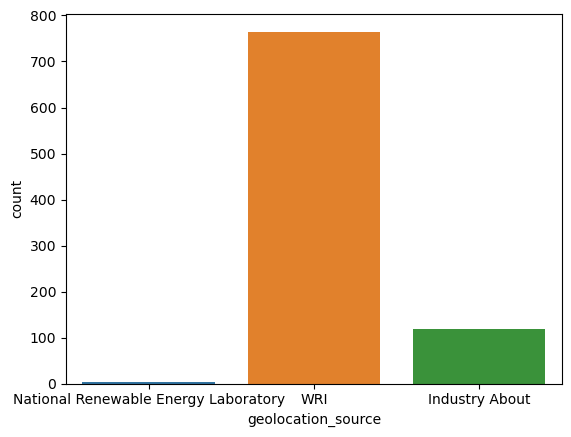

In [38]:
sns.countplot(x='geolocation_source', data=powrDF)
plt.show()

In [39]:
powrDF.geolocation_source.isnull().sum()/908*100

2.092511013215859

In [40]:
powrDF.geolocation_source.mode()

0    WRI
Name: geolocation_source, dtype: object

In [40]:
(powrDF['geolocation_source'] == 'WRI').sum()/powrDF.geolocation_source.count()*100

86.14864864864865

86.16% of geolocation_source data is 'WRI'.

Therefore imputing ' WRI' to NaN values in geolocation_source column

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [43]:
si = si.fit(powrDF[['geolocation_source']])

In [44]:
powrDF[['geolocation_source']] = si.transform(powrDF[['geolocation_source']])

In [45]:
powrDF[['geolocation_source']].isnull().sum()

geolocation_source    0
dtype: int64

There are no more null values in 'geolocation_source' column.

Checking for Null values in continuous / discrete columns.

In [46]:
powrDF.select_dtypes(exclude = object).isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
commissioning_year       374
year_of_capacity_data    388
generation_gwh_2013      461
generation_gwh_2014      503
generation_gwh_2015      479
generation_gwh_2016      467
generation_gwh_2017      461
generation_gwh_2018      454
dtype: int64

In [47]:
powrDF.latitude

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
902    16.2949
903    12.8932
904    15.2758
905    24.3500
906     9.9344
Name: latitude, Length: 907, dtype: float64

In [48]:
powrDF.longitude

0      73.2407
1      74.6090
2      69.3732
3      91.3602
4      82.4091
        ...   
902    77.3568
903    78.1654
904    75.5811
905    73.7477
906    77.4768
Name: longitude, Length: 907, dtype: float64

Using KNN Imputation technique for imputing missing data.

In [49]:
from sklearn.impute import KNNImputer

In [50]:
imp = KNNImputer(n_neighbors=2)

In [51]:
powrDF[['latitude','longitude']] = imp.fit_transform(powrDF[['latitude','longitude']])

In [52]:
powrDF[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

No more values from latitude and longititude

In [53]:
powrDF.commissioning_year.isnull().sum()/908*10

4.118942731277533

In [54]:
powrDF.commissioning_year.mode()

0    2015.0
Name: commissioning_year, dtype: float64

In [55]:
powrDF.commissioning_year.mode()

0    2015.0
Name: commissioning_year, dtype: float64

In [56]:
(powrDF['commissioning_year'] == 2013.0).sum()/powrDF.commissioning_year.count()*100

4.690431519699812

In [57]:
powrDF.commissioning_year.mean()

1997.078799249531

In [58]:
powrDF.commissioning_year.median()

2001.0

In [59]:
(powrDF['commissioning_year'] == 1996.0).sum()/powrDF.commissioning_year.count()*100

2.4390243902439024

In [60]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['commissioning_year']])
powrDF[['commissioning_year']] = si.transform(powrDF[['commissioning_year']])
powrDF[['commissioning_year']].isnull().sum()

commissioning_year    0
dtype: int64

In [61]:
powrDF.commissioning_year = powrDF.commissioning_year.astype('int64')

In [62]:
powrDF.commissioning_year

0      2011
1      2001
2      2001
3      2004
4      2015
       ... 
902    2016
903    2001
904    2001
905    2001
906    2001
Name: commissioning_year, Length: 907, dtype: int64

In [63]:
powrDF.year_of_capacity_data.value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

Dropping column year_of_capacity_data as all the values in it are '2018

In [64]:
powrDF.drop(columns = 'year_of_capacity_data',inplace = True)

In [65]:
powrDF.shape

(907, 18)

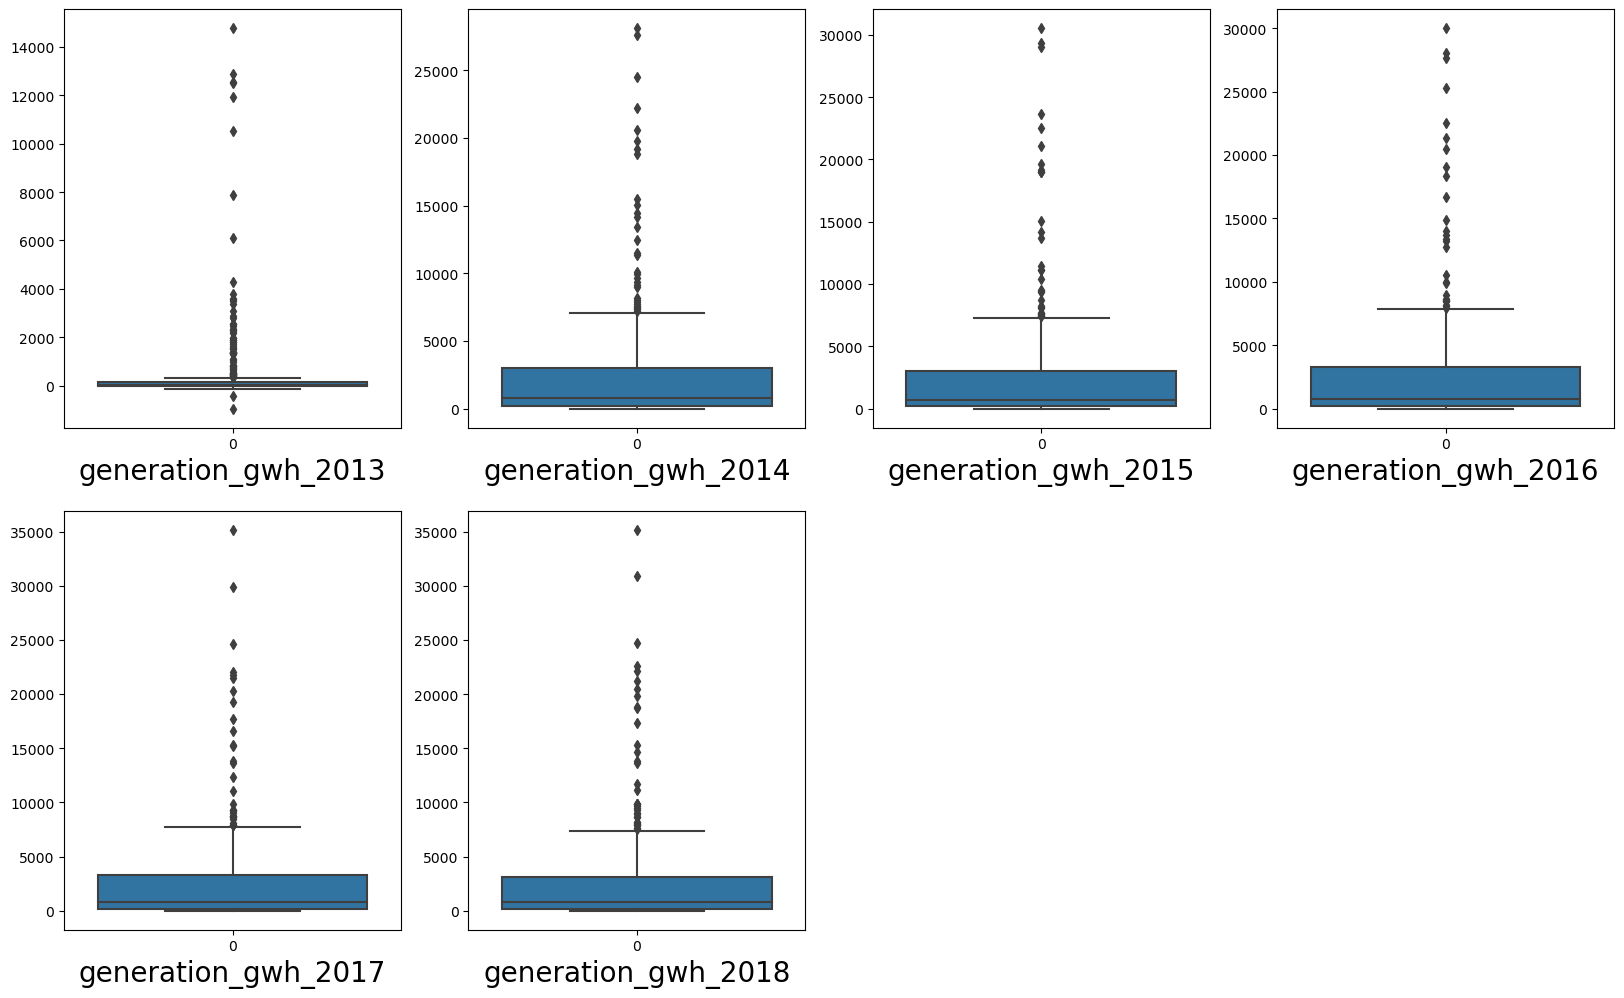

In [67]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source','latitude','longitude','commissioning_year',])
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1, how='all')
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

outliers exist, therefore imputing with KNN imputation technique.

In [68]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2013']])
powrDF[['generation_gwh_2013']] = si.transform(powrDF[['generation_gwh_2013']])
powrDF[['generation_gwh_2013']].isnull().sum()

generation_gwh_2013    0
dtype: int64

In [69]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2014']])
powrDF[['generation_gwh_2014']] = si.transform(powrDF[['generation_gwh_2014']])
powrDF[['generation_gwh_2014']].isnull().sum()

generation_gwh_2014    0
dtype: int64

In [70]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2015']])
powrDF[['generation_gwh_2015']] = si.transform(powrDF[['generation_gwh_2015']])
powrDF[['generation_gwh_2015']].isnull().sum()

generation_gwh_2015    0
dtype: int64

In [71]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2016']])
powrDF[['generation_gwh_2016']] = si.transform(powrDF[['generation_gwh_2016']])
powrDF[['generation_gwh_2016']].isnull().sum()

generation_gwh_2016    0
dtype: int64

In [72]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2017']])
powrDF[['generation_gwh_2017']] = si.transform(powrDF[['generation_gwh_2017']])
powrDF[['generation_gwh_2017']].isnull().sum()

generation_gwh_2017    0
dtype: int64

In [73]:
powrDF.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
url                      0
geolocation_source       0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018    454
generation_gwh_2019    906
dtype: int64

There are no more null values in the dataframe.

Extracting the age of Power plants from commissioning_year column will give a better insight into its relationship with target column data.¶

In [74]:
powrDF['Age'] = powrDF['commissioning_year'].apply(lambda y: 2021 - y)

In [75]:
powrDF.drop(columns=['commissioning_year'],inplace=True)

In [76]:
powrDF

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Age
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,14.26400,794.587100,697.450781,737.205450,817.977250,NaN,NaN,10
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,http://www.ultratechcement.com/,WRI,14.26400,794.587100,697.450781,737.205450,817.977250,NaN,NaN,20
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,14.26400,794.587100,697.450781,737.205450,817.977250,NaN,NaN,20
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,http://www.cea.nic.in/,WRI,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,17
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,http://www.cea.nic.in/,WRI,14.26400,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,http://www.cea.nic.in/,WRI,14.26400,794.587100,0.994875,233.596650,865.400000,686.500000,NaN,5
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,http://karnatakapower.com,Industry About,1.92500,794.587100,697.450781,737.205450,817.977250,NaN,NaN,20
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2.05400,794.587100,697.450781,737.205450,817.977250,NaN,NaN,20
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,http://www.hzlindia.com/,WRI,14.26400,794.587100,697.450781,737.205450,817.977250,NaN,NaN,20


Analysing the continuous data type Target column

In [77]:
powrDF.capacity_mw

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

<Axes: xlabel='capacity_mw', ylabel='Density'>

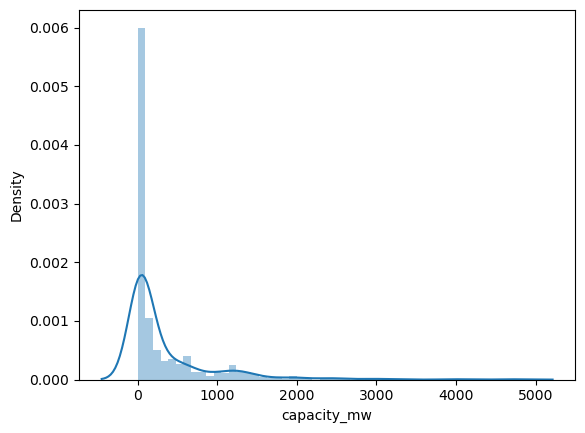

In [78]:
sns.distplot(powrDF.capacity_mw)

In [79]:
powrDF.select_dtypes(include = object).isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
primary_fuel             0
url                      0
geolocation_source       0
generation_gwh_2019    906
dtype: int64

In [80]:
powrDF.capacity_mw.skew()

3.123576153626497

Distribution of data is right skewed.

Analysing Feature columns with Continuous Data.

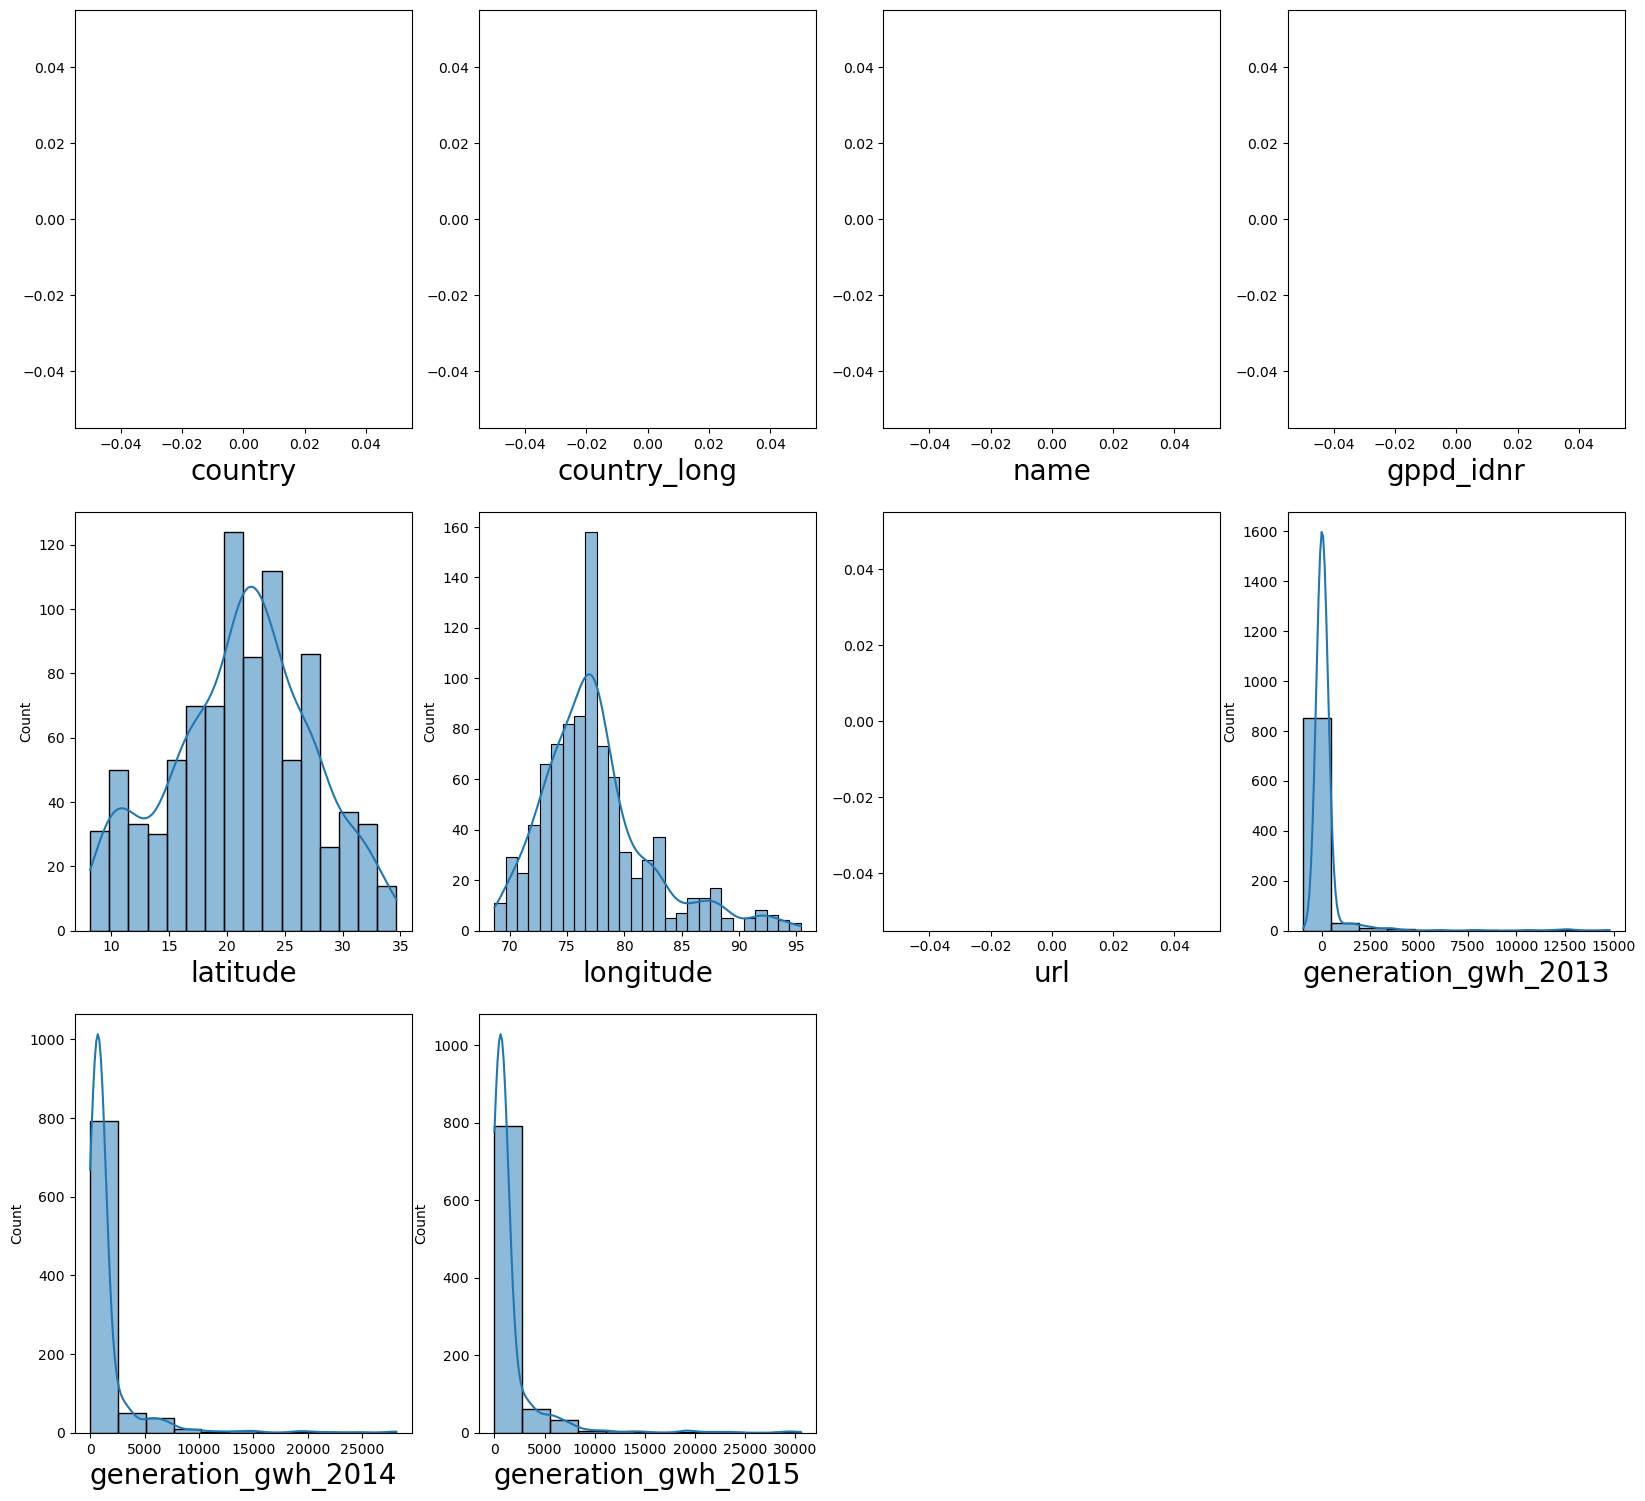

In [82]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']):
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        data = pd.to_numeric(powrDF[col], errors='coerce').dropna()
        sns.histplot(data, kde=True)
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

data distributuions are skewed

capacity_mw vs continuous / discrete data type columns

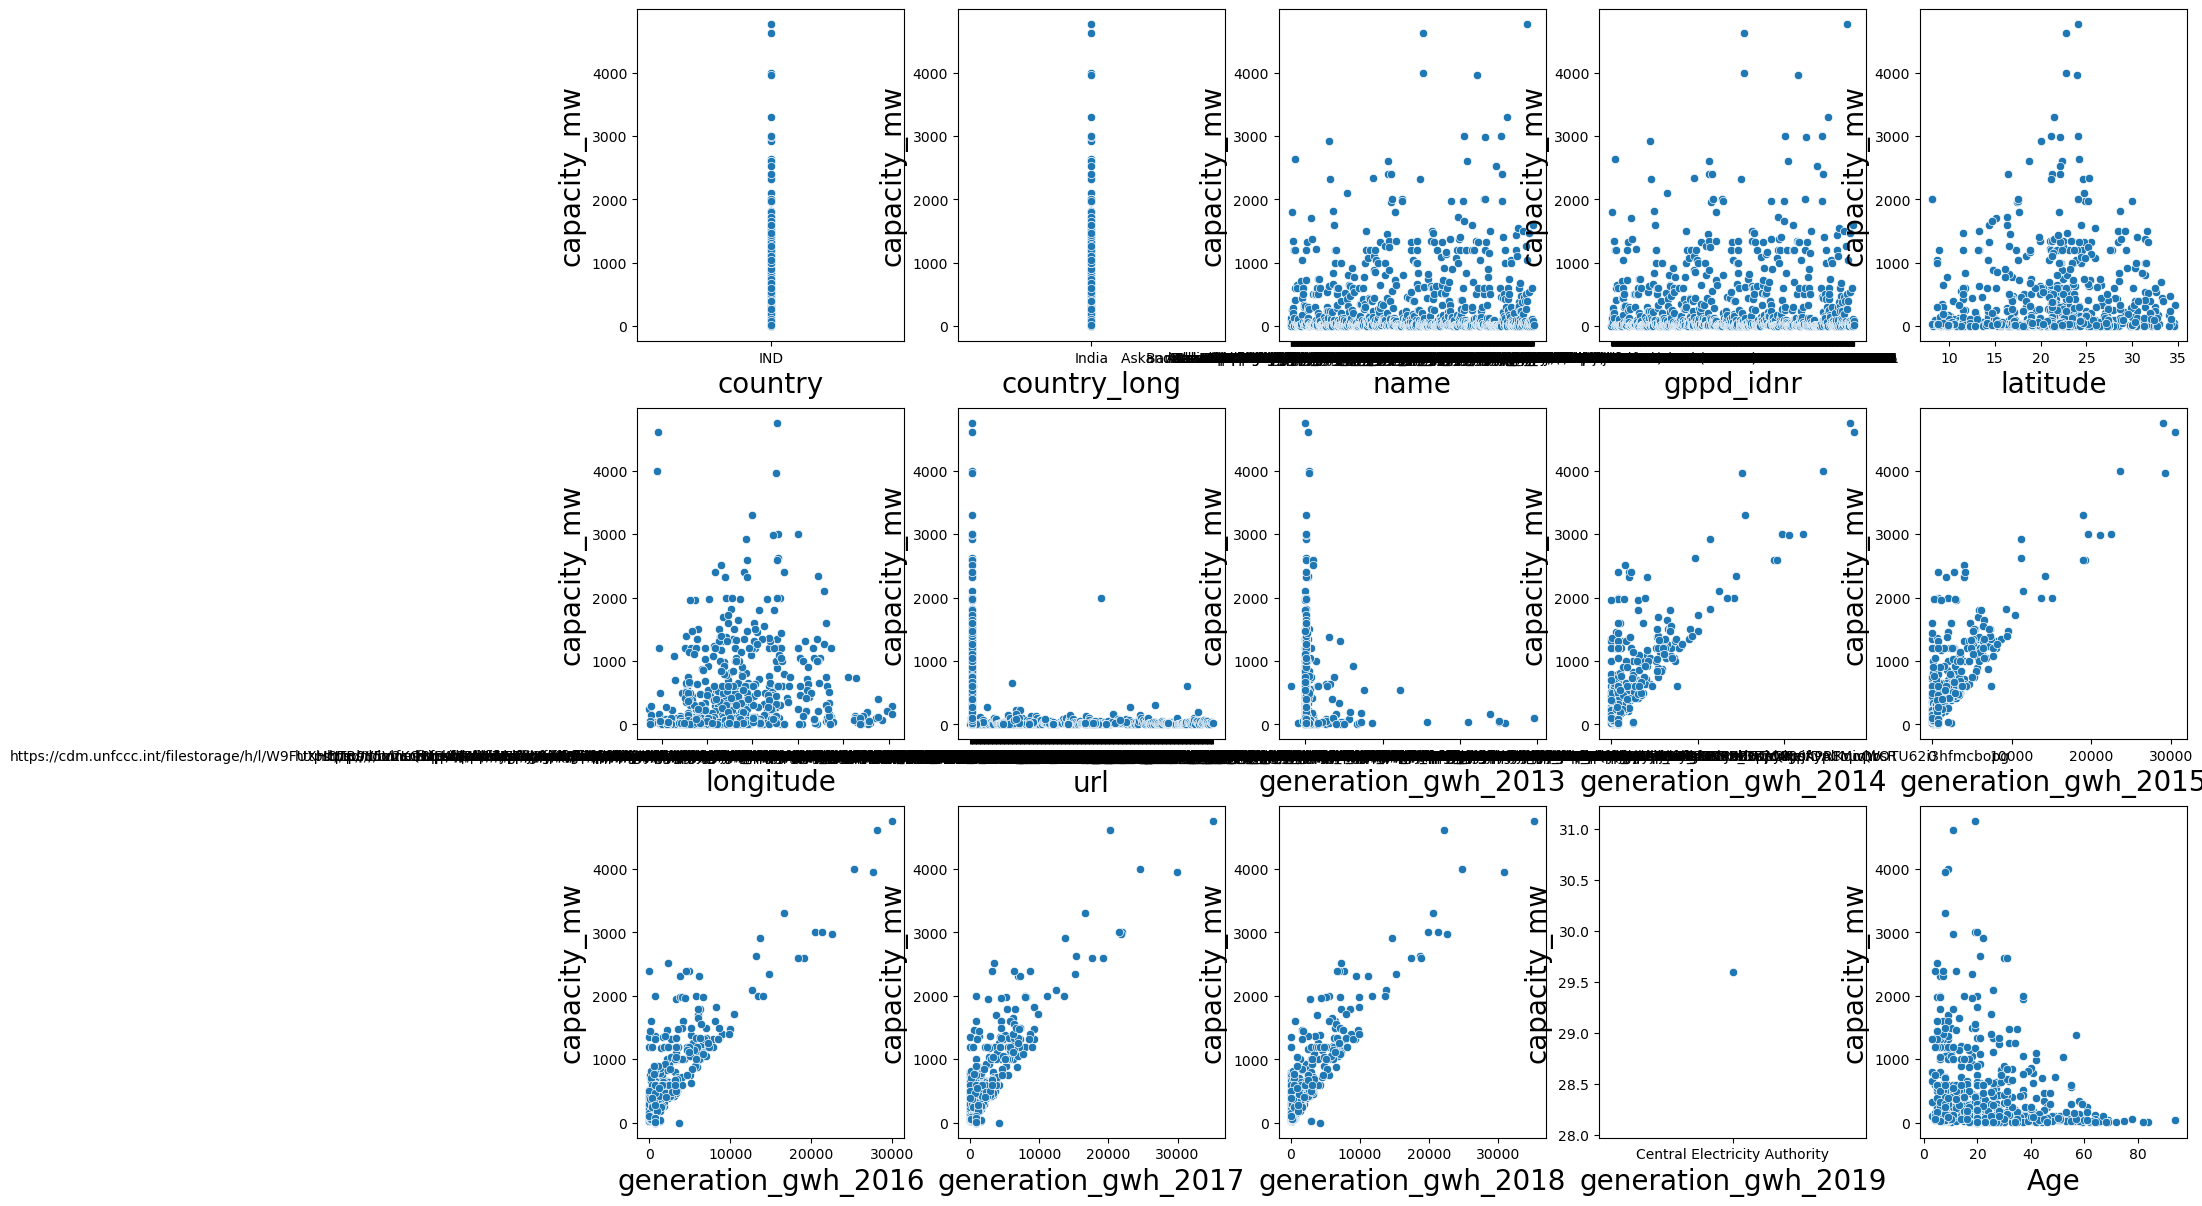

In [85]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = powrDF['capacity_mw']
X =  powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(x=X[col], y=y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()
plt.show()

We can observe a linear relationship between columns generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_20

<Figure size 600x600 with 0 Axes>

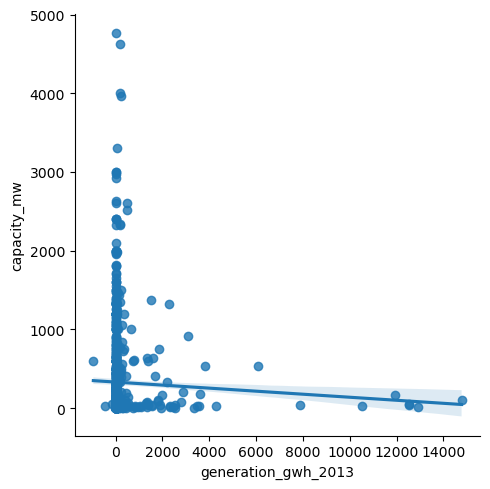

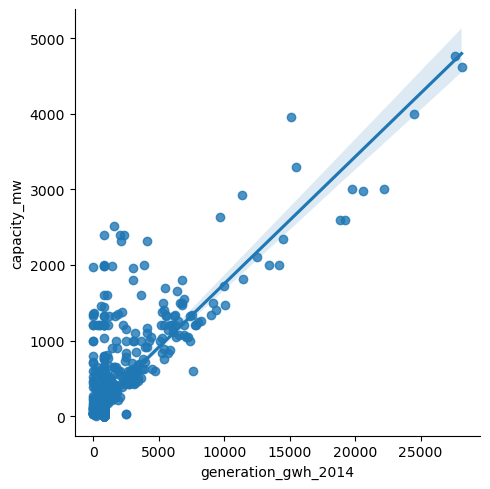

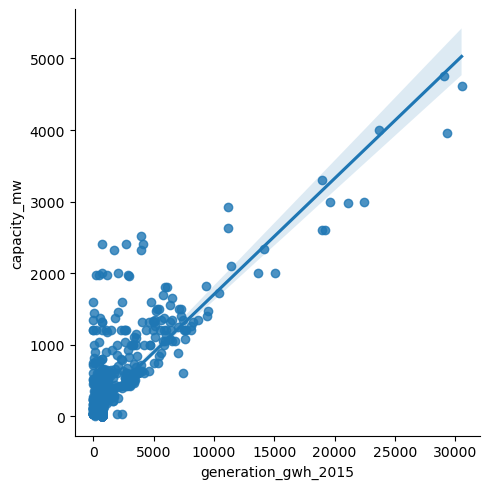

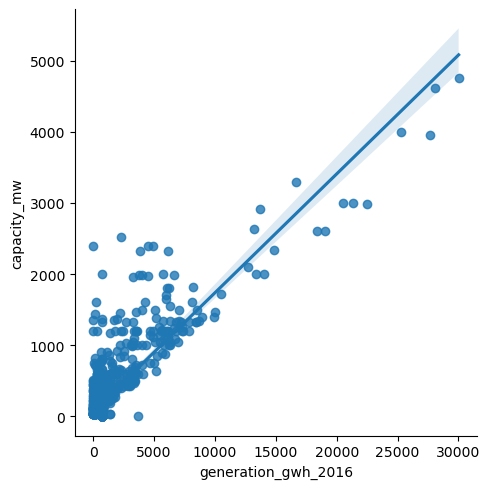

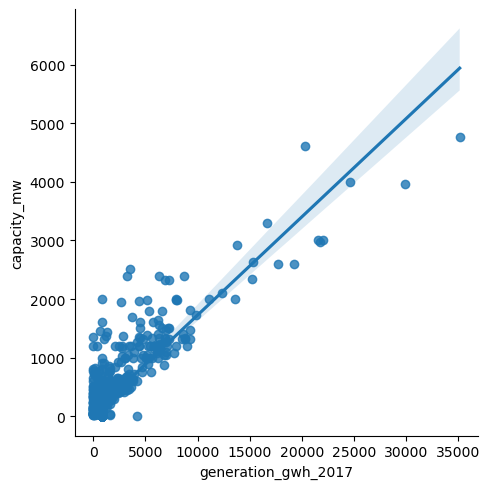

In [86]:
plt.figure(figsize=(6,6),facecolor='white')
X = ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
for col in X:
    sns.lmplot(x = col,y = 'capacity_mw',data = powrDF)

capacity_mw vs categorical data type columns

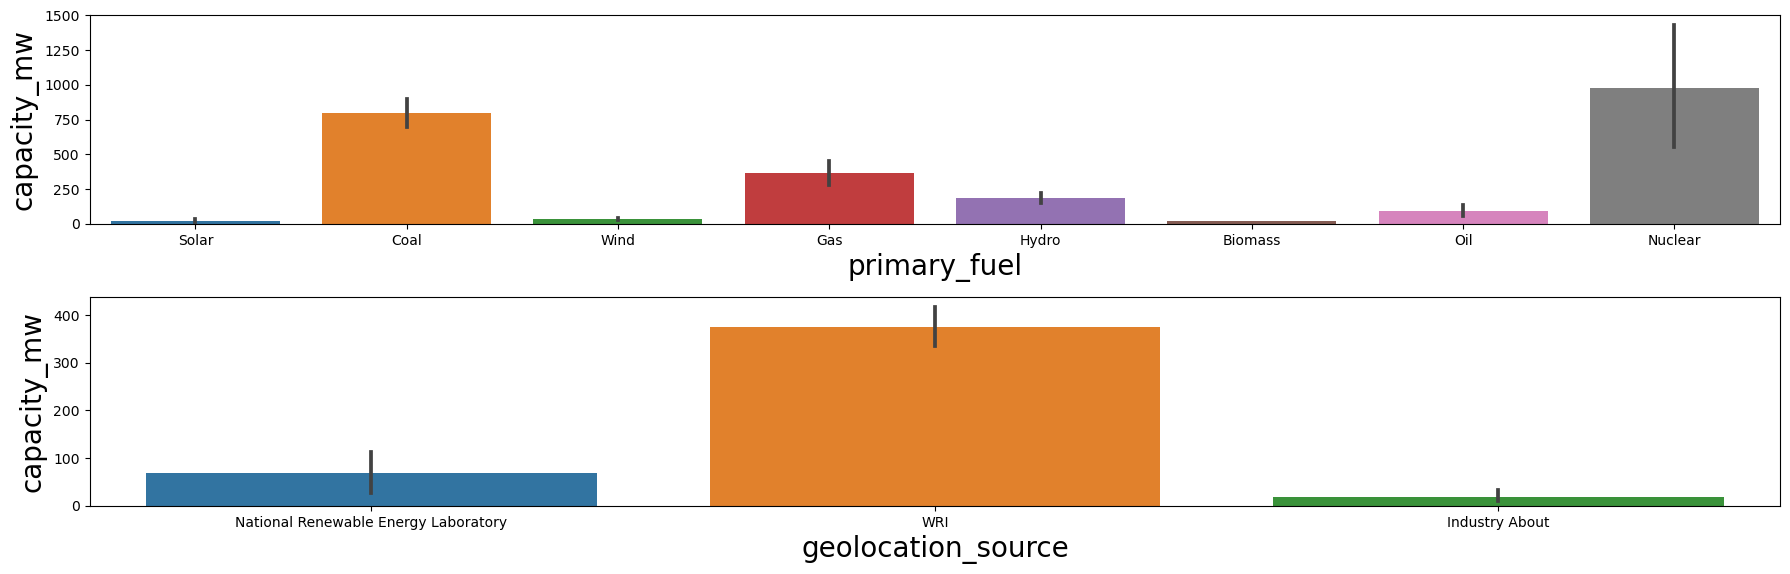

In [88]:
plt.figure(figsize=(18,25),facecolor='white')
plotnum=1
y = powrDF['capacity_mw']
X =  powrDF[['primary_fuel','geolocation_source']]
for col in X:
    if plotnum<=23:
        plt.subplot(9,1,plotnum)
        sns.barplot(x=X[col],y=y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()
plt.show()

from the graphs above it is observed that Nuclear fuel type power plants have the highest capacity followed by coal type.

Most of the data for geolocation source is provided by WRI.

Analysing the categorical data type Target column

In [89]:
powrDF.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

There are 8 unique categories in primary_fuel

<Axes: xlabel='primary_fuel', ylabel='count'>

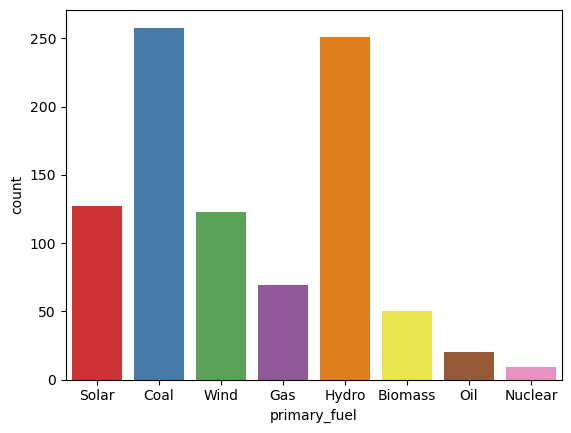

In [91]:
sns.countplot(x='primary_fuel', data=powrDF, palette="Set1")

In [92]:
powrDF.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

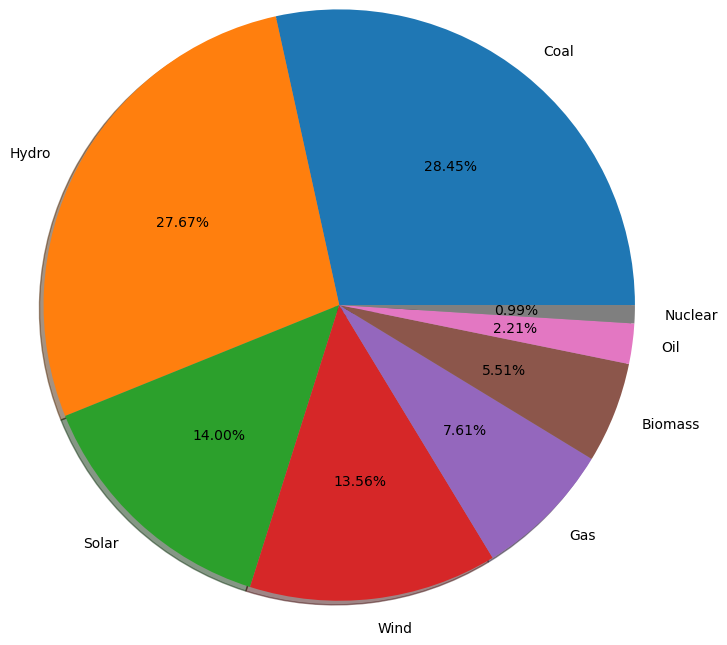

In [93]:
labels = 'Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'
fig, ax = plt.subplots()
ax.pie(powrDF['primary_fuel'].value_counts(),labels = labels,radius =2,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class:

'Coal' : Has 28.45% of total values

'Hydro' : Has 27.67% of total values

'Solar' : Has 14% of total values

'Wind' : Has 13.56% of total values

'Gas' : Has 7.61% of total values

'Biomass' : Has 5.51% of total values

'Oil' : Has 2.21% of total values

'Nuclear' : Has 0.99% of total values

Classes are imbalanced.

Checking for Outliers in columns with continuous distribution

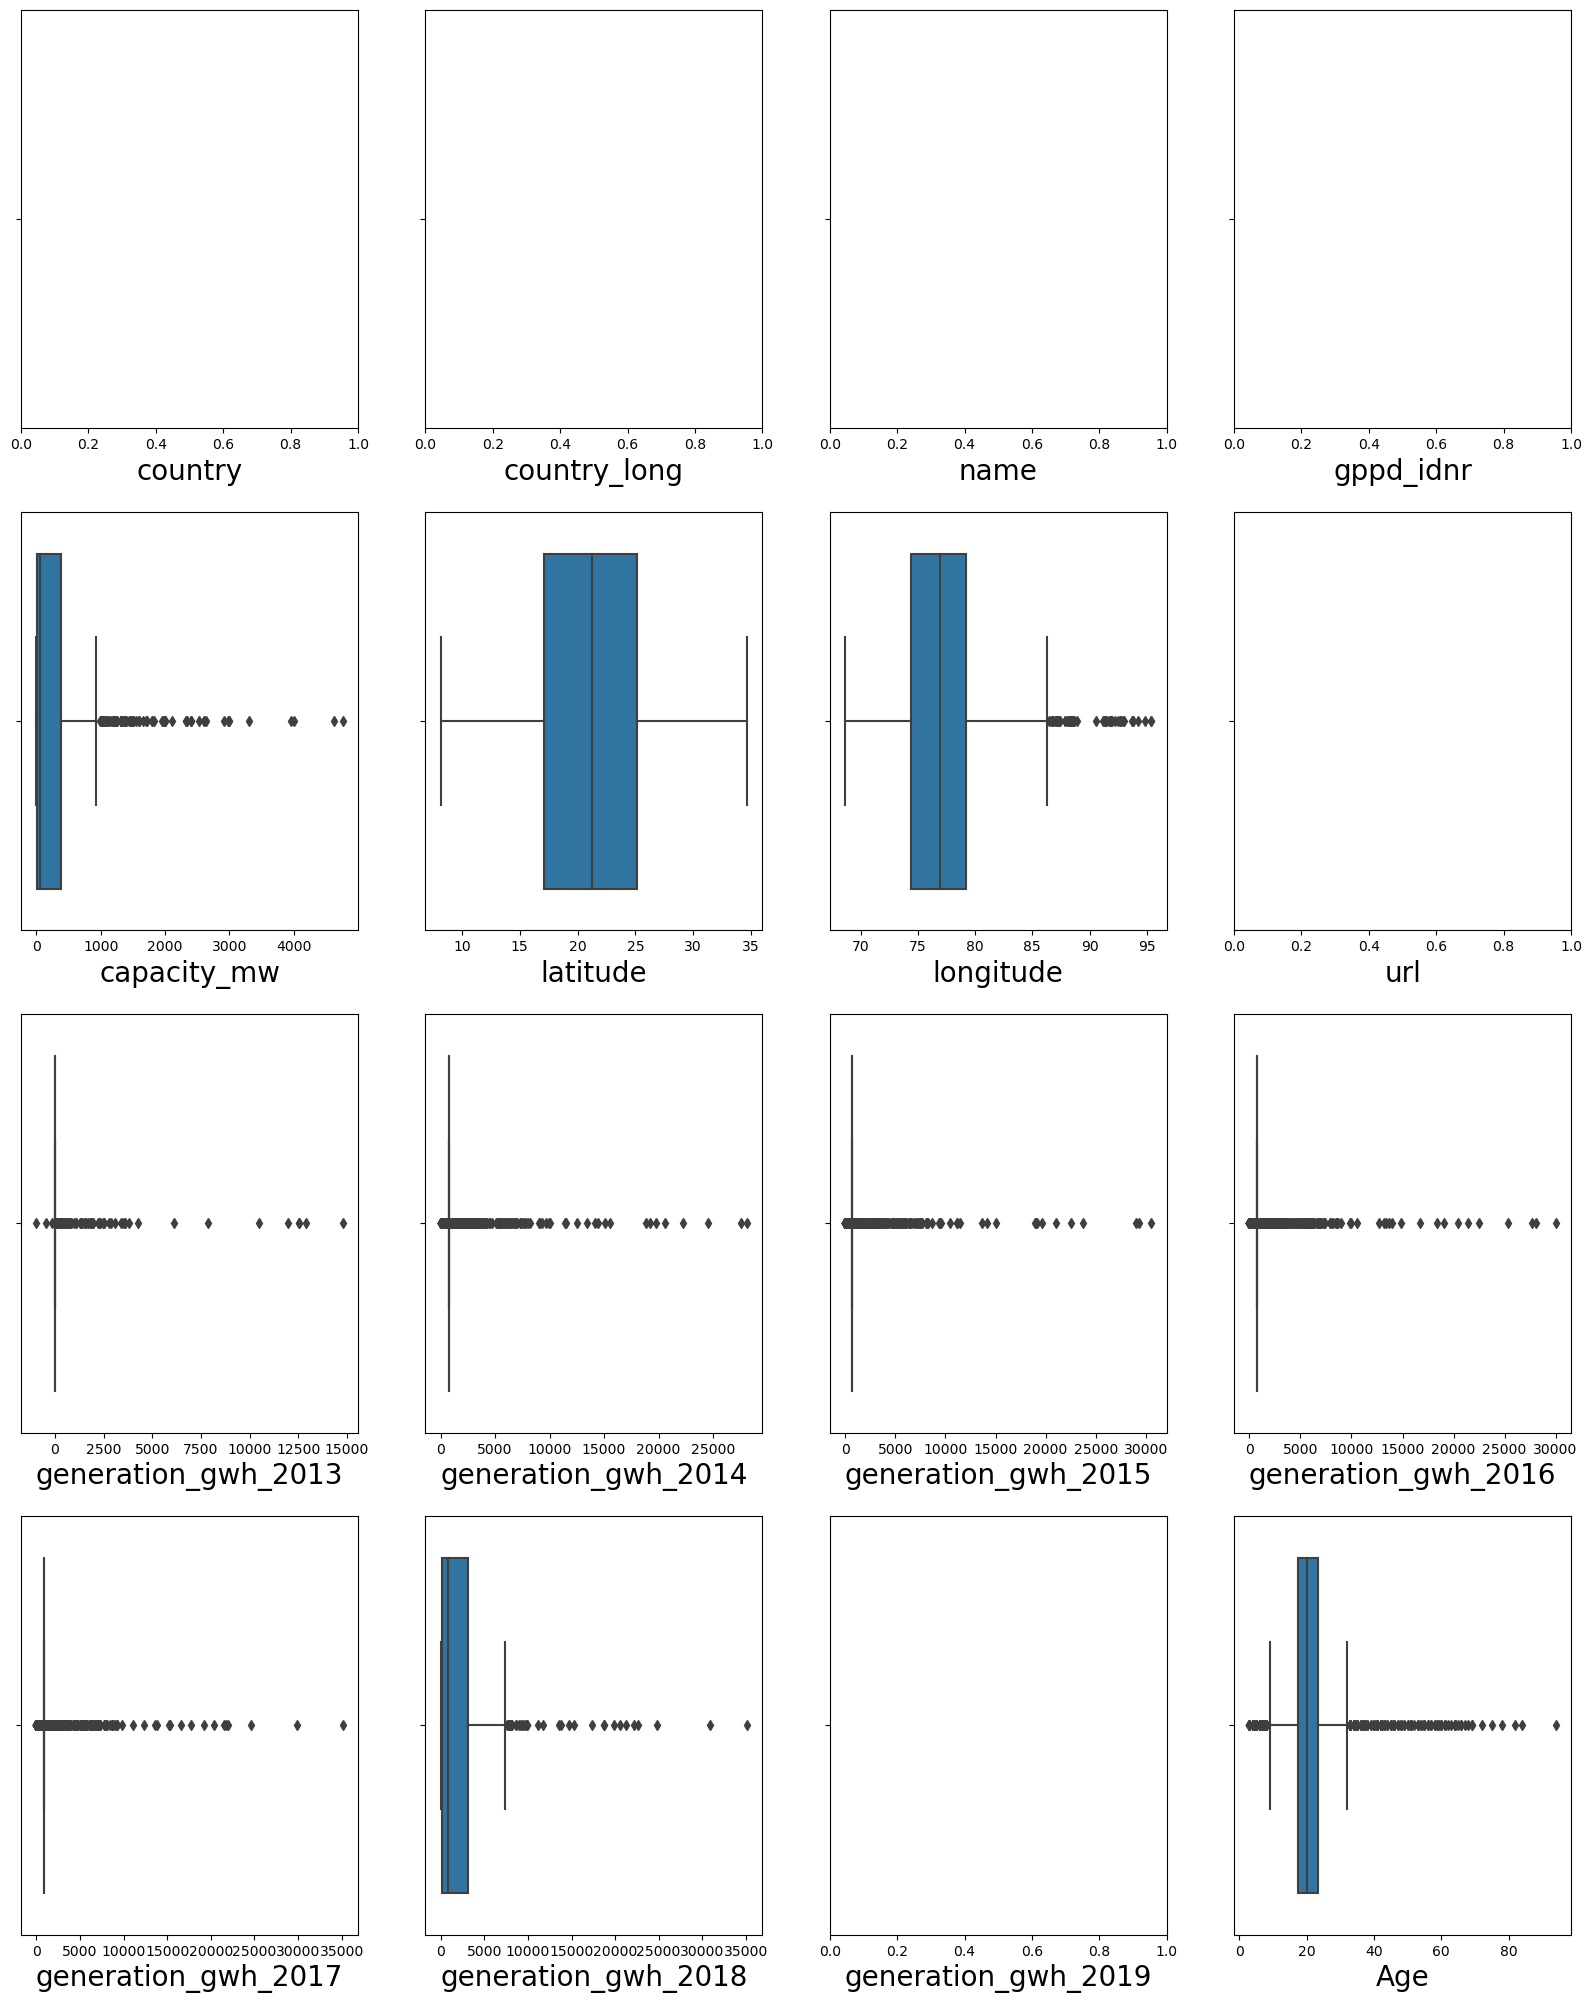

In [100]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = powrDF.drop(columns=['primary_fuel','geolocation_source'])
X = X.apply(pd.to_numeric, errors='coerce')

for col in X.columns:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(x=X[col].dropna())
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

All columns except latitude have a lot of outliers

In [101]:
df2 = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [103]:
from scipy.stats import zscore
df2_numeric = df2.apply(pd.to_numeric, errors='coerce')
df2_numeric = df2_numeric.dropna()
zscor = zscore(df2_numeric)
z_score_abs = np.abs(zscor)

df3 = df2_numeric[(z_score_abs < 3).all(axis=1)]

In [104]:
df3.shape

(0, 15)

In [105]:
df2.shape

(907, 15)

% Data loss

In [107]:
loss=(908-852)/908 * 100
loss

6.167400881057269

6.16% Data loss is within acceptable range

In [108]:
dropindx = powrDF.index.difference(df3.index)

In [109]:
powrDF.drop(dropindx,inplace = True)

In [110]:
powrDF.shape

(0, 18)

Checking for Skewness in Data

In [113]:
powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).skew()

country               NaN
country_long          NaN
name                  NaN
gppd_idnr             NaN
latitude              NaN
longitude             NaN
url                   NaN
generation_gwh_2013   NaN
generation_gwh_2014   NaN
generation_gwh_2015   NaN
generation_gwh_2016   NaN
generation_gwh_2017   NaN
generation_gwh_2018   NaN
generation_gwh_2019   NaN
Age                   NaN
dtype: float64

Skewness exists in all columns except latitude

Reducing skewness further using PowerTransformer

In [114]:
from sklearn.preprocessing import PowerTransformer


In [119]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)
df4 = pd.DataFrame({
    'col1': [1, 2, 3, 4],
    'col2': [5, 6, 7, 8]
    
})
def create_dataframe():
    global df4
    df4 = pd.DataFrame({
        'col1': [1, 2, 3, 4],
        'col2': [5, 6, 7, 8]
})

create_dataframe()
transformed = powtrans.fit_transform(df4)

In [120]:
transformed= powtrans.fit_transform(df4)

In [121]:
transformed = pd.DataFrame(transformed, columns=df4.columns)

In [122]:
transformed.skew()

col1   -0.182952
col2   -0.080663
dtype: float64

Skewness has been greatly reduced

In [130]:
powrDF2 = powrDF.copy()

In [135]:
dumm = pd.get_dummies(powrDF[['geolocation_source','primary_fuel']],drop_first = False)

In [136]:
powrDF2 = powrDF2.join(dumm)

In [137]:
powrDF2.drop(columns = ['geolocation_source','primary_fuel'],axis = 1, inplace = True,errors='ignore')


In [138]:
powrDF2

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,url,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Age


Finding Correlation

In [139]:
t_corr = powrDF2.corr()
t_corr

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age
capacity_mw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


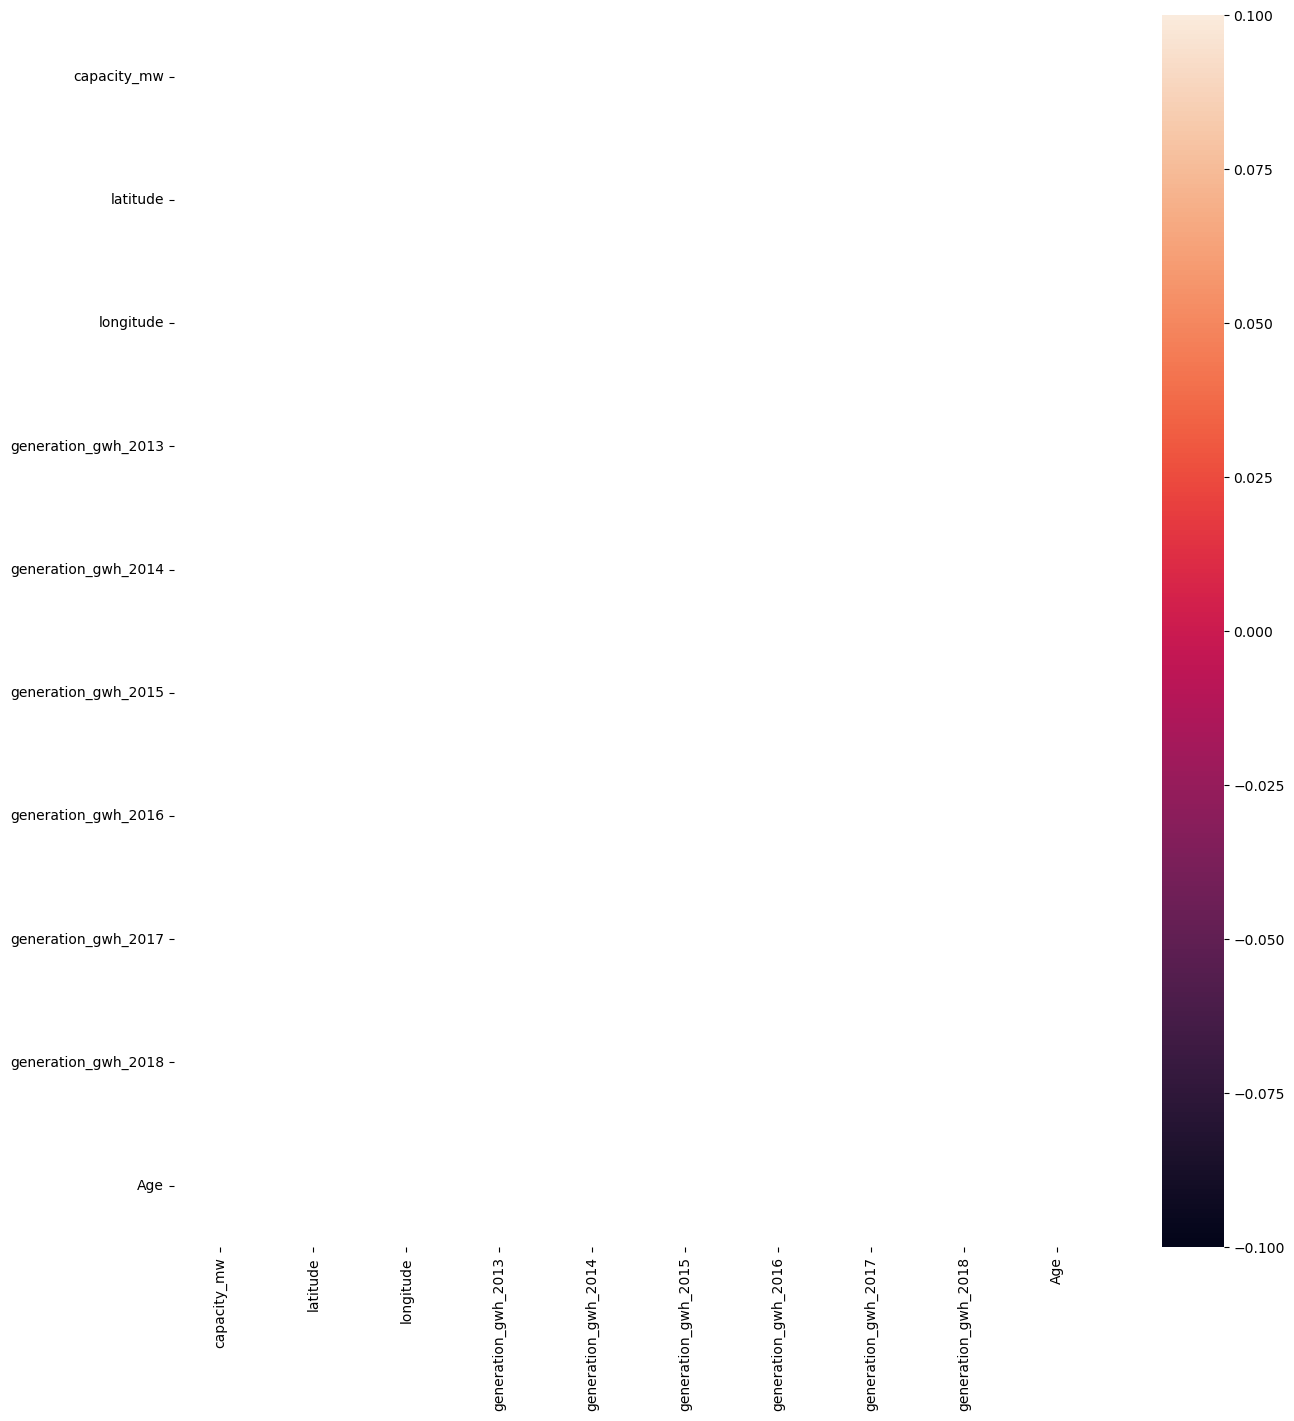

In [141]:
plt.figure(figsize=(15,16))
sns.heatmap(t_corr,annot=True,linewidth=1)
plt.show()

Visualizing correlation of feature columns with label column.

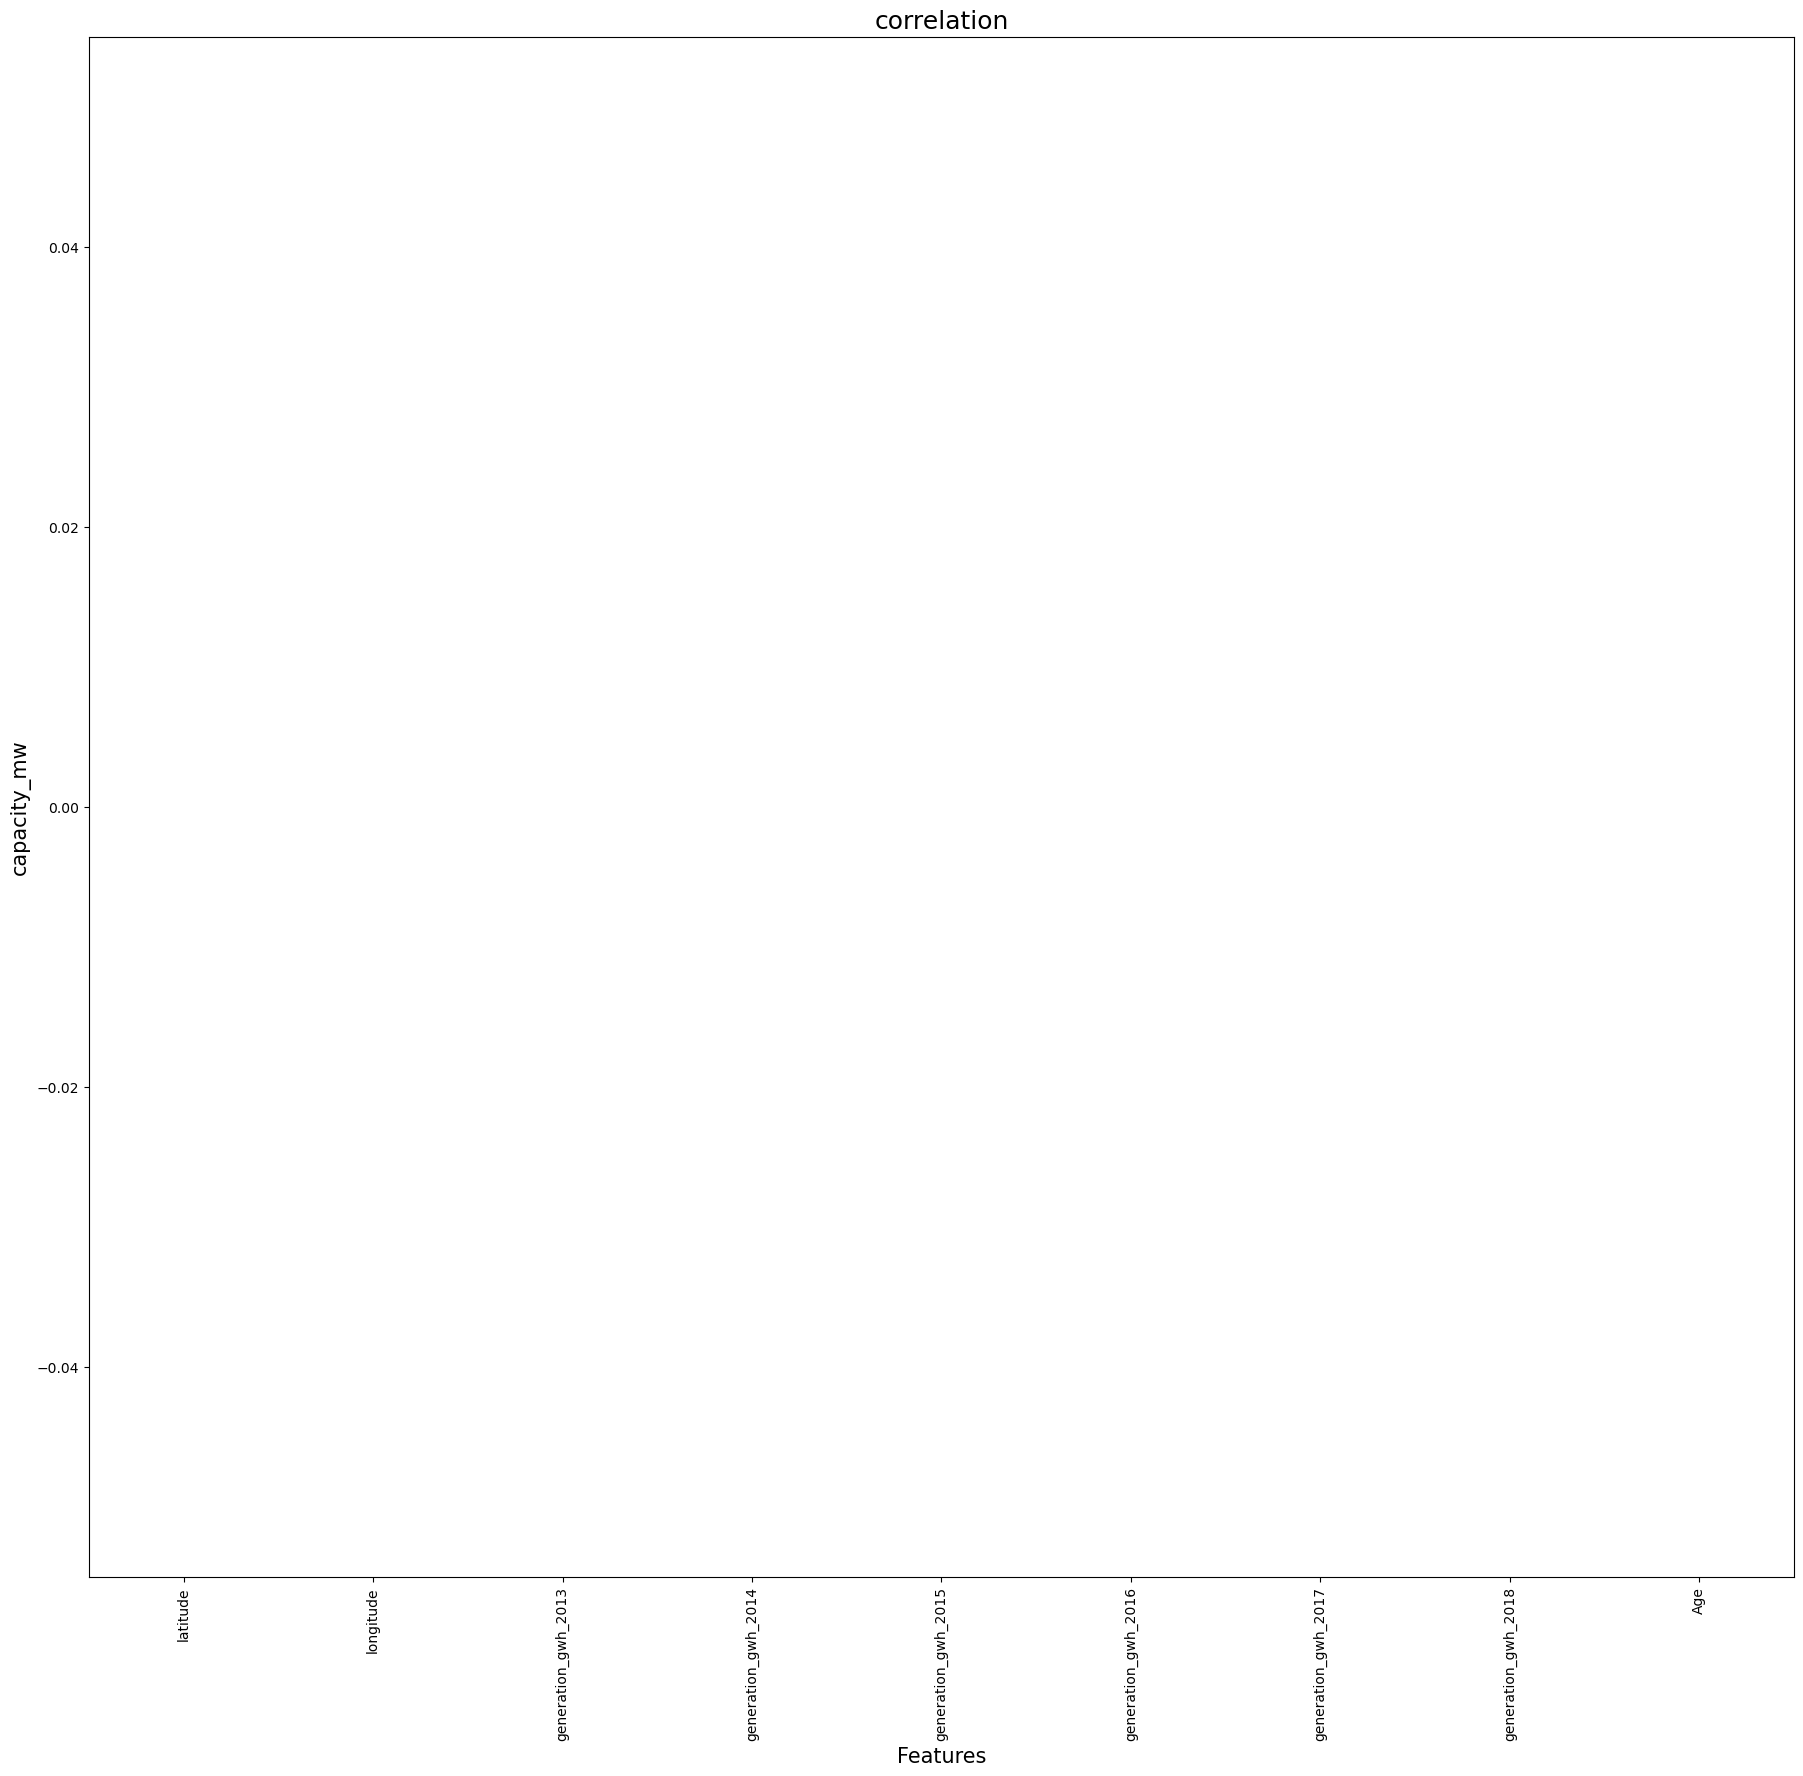

In [142]:
plt.figure(figsize = (22,20))
powrDF2.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()
